In [47]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [48]:
def distEclud(x, y):
    """
    计算欧氏距离
    """
    return np.sqrt(np.sum((x - y) ** 2))


def randomCent(dataSet, k):
    """
    为数据集构建一个包含 K 个随机质心的集合 
    """
    m, n = dataSet.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        index = int(np.random.uniform(0, m))
        centroids[i, :] = dataSet[index, :]
    return centroids


class KMeans:

    def __init__(self):
        self.dataSet = None
        self.k = None

    def fit(self, dataSet, k):
        self.dataSet = dataSet
        self.k = k
        m = np.shape(dataSet)[0]
        # 第一列存样本属于哪一簇
        # 第二列存样本的到簇的中心点的误差 
        clusterAssment = np.mat(np.zeros((m, 2)))
        clusterChange = True
        centroids = randomCent(self.dataSet, k)
        while clusterChange:
            clusterChange = False
            for i in range(m):
                minDist = 1e6
                minIndex = -1
                # 遍历所有的质心, 找出最近的质心 
                for j in range(k):
                    distance = distEclud(centroids[j, :], self.dataSet[i, :])
                    if distance < minDist:
                        minDist = distance
                        minIndex = j
                # 更新每一行样本所属的簇
                if clusterAssment[i, 0] != minIndex:
                    clusterChange = True
                    clusterAssment[i, :] = minIndex, minDist ** 2
            # 更新质心
            for j in range(k):
                pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]  # 获取簇类所有的点 
                centroids[j, :] = np.mean(pointsInCluster, axis=0)  # 对矩阵的行求均值
        return centroids, clusterAssment

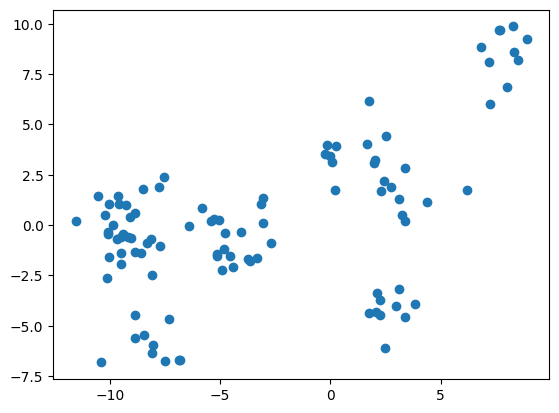

In [49]:
X, y = datasets.make_blobs(n_samples=100, centers=10, random_state=3)
plt.scatter(X[:, 0], X[:, 1])

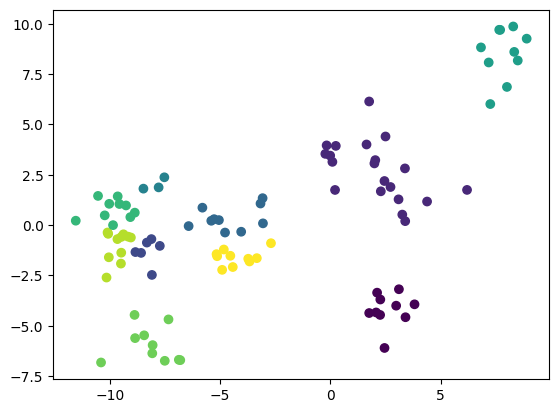

In [50]:
model = KMeans()
center, clusterAssment = model.fit(X, k=10)
y_pred = np.squeeze(np.array(clusterAssment[:, 0]))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

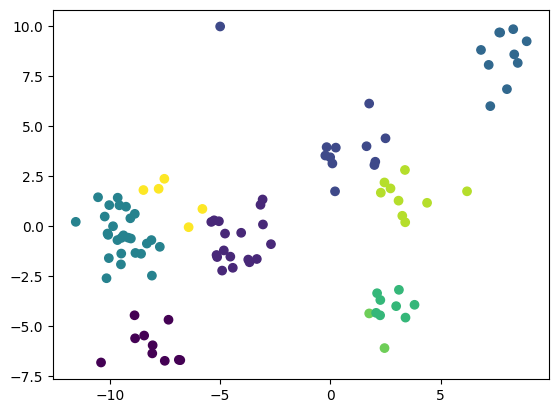

In [51]:
X = np.vstack((X, [-5, 10]))
c, ca = model.fit(X, k=10)
y_pred = np.squeeze(np.array(ca[:, 0]))
# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c=y_pred)